In this doc, we'll be using GPy to do basic Gaussian Process Regression (GPR) on sample data. First import some packages.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import GPy as gpy

Now create sample data. GPy uses 2-dimensional arrays (so a 1-d NumPy array `v` needs to be embedded as a 2-d array of shape `(len(v), 1)`, which we will call a "column array" in the following). Note that `X` is generated as a column array, according to the requirements of GPy.

In [2]:
def create_sample_values(n, loc=0, scale=1):
    # Returns a (n, ndim)-shaped NumPy-array. The items are normally distributed according to scale, loc. 
    return stats.norm.rvs(loc=0, scale=1, size=(n,1))

# Create 6 points linearly spaced in the interval [0, 10]
X1 = np.linspace(0, 10, 6)[:, np.newaxis]

# Generate 1-d sample data
fX1 = create_sample_values(6)

Now, we generate the standard RBF kernel with our input dimension 1 (which must be the same as `X.shape[1]`, the length of the second dimension of `X`). In the 1-dimensional case, we can simply plot the covariance function as a function of difference.

{'covariance': [[<matplotlib.lines.Line2D at 0x19d86d4cac0>]]}

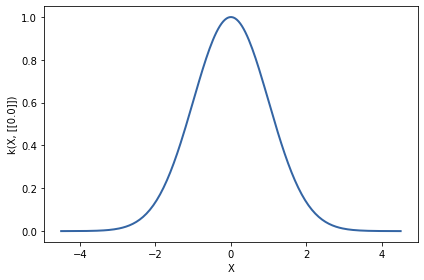

In [27]:
kern1 = gpy.kern.RBF(input_dim=1)
kern1.plot()

Now, generate our model using `X1`, `fX1`, `kern1`. Printing `model1` returns an overview of the parameters of `model1`.

In [4]:
model1 = gpy.models.gp_regression.GPRegression(X1, fX1, kern1)
print(model1)


Name : GP regression
Objective : 9.941397057922762
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    1.0  |      +ve      |        


`model1.plot()` returns a plot which gives an idea of the generated model, and - in this case - completely defines the model.

{'dataplot': [<matplotlib.collections.PathCollection at 0x19d8588eeb0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x19d858a8430>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x19d858a8670>]}

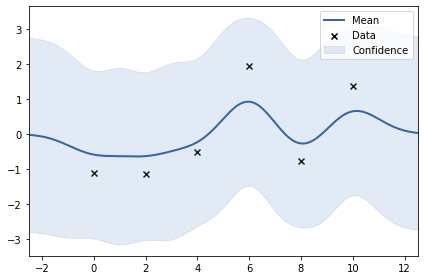

In [5]:
model1.plot()

This model can be used to predict distributions at arbitrary points in our coordinate space (here, we predict the distribution in the point 5.4). We use the `predict` method of `model1`, which accepts a Numpy array of shape `(n, ndim)` for an integer `n` and the input dimension of `model1`, and returns two NumPy arrays: both of shape `(n, 1)` containing predicted means and predicted variances, respectively. We also use the `predict_noiseless` method, and see that the predicted means are the same, and the predicted variances differ by the parameter `Gaussian_noise.variance` of `model1`.

In [6]:
def generate_point(x):
    return np.array([x])[:, np.newaxis]

point1 = generate_point(5.4)
point1_predict_mean_noiseless, point1_predict_var_noiseless = model1.predict_noiseless(point1)

print("The predicted mean in {} is".format(point1[0, 0]), point1_predict_mean_noiseless[0, 0])
print("The predicted variance in {} without noise is".format(point1[0, 0]), point1_predict_var_noiseless[0, 0])

point1_predict_mean_noisy, point1_predict_var_noisy = model1.predict(point1)

if point1_predict_mean_noiseless == point1_predict_mean_noisy:
    print("The predicted mean in the noiseless case is equal to the predicted mean in the noisy case.")
    
else:
    print("The predicted mean in the noiseless case is not equal to the predicted mean in the noisy case.")
    
if point1_predict_var_noisy - point1_predict_var_noisy == model1.Gaussian_noise.variance:
    print(
        "The difference of the predicted variance in the noisy and the noiseless case is equal to the likelihood noise."
    )

else:
    print(
        "The difference of the predicted variance of the noisy and the noiseless case is not equal to the likelihood noise."
    )

The predicted mean in 5.4 is 0.7316043074552478
The predicted variance in 5.4 without noise is 0.5997141481194486
The predicted mean in the noiseless case is equal to the predicted mean in the noisy case.
The difference of the predicted variance of the noisy and the noiseless case is not equal to the likelihood noise.


Consider what happens when we lower the Gaussian noise level the model assumes. We see that the distribution confidence interval becomes narrower.

{'dataplot': [<matplotlib.collections.PathCollection at 0x19d85153310>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x19d869ac430>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x19d869ac730>]}

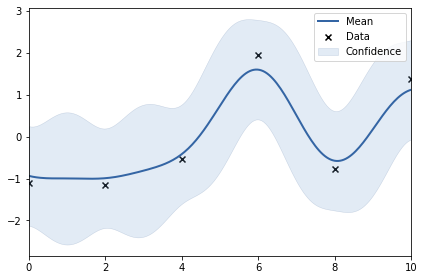

In [7]:
model1.Gaussian_noise.variance = 0.2
model1.plot(plot_limits=(0,10))

When we print the model parameters, we can see that the value for `Gaussian_noise.variance` has changed.

In [8]:
print(model1)


Name : GP regression
Objective : 10.09672214621277
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |  value  |  constraints  |  priors
  rbf.variance             |    1.0  |      +ve      |        
  rbf.lengthscale          |    1.0  |      +ve      |        
  Gaussian_noise.variance  |    0.2  |      +ve      |        


Now we remove likelihood noise entirely. If our prior data is too dense, the resulting model will not create a useful interpolating function space (try increasing `n` in `X1` and `fX1`).

{'dataplot': [<matplotlib.collections.PathCollection at 0x19d869ce1c0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x19d86a227c0>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x19d86a22ac0>]}

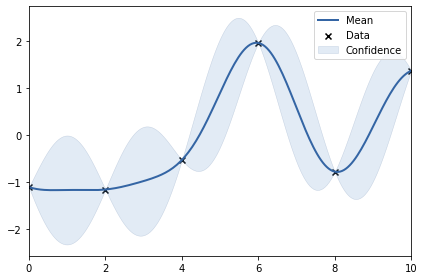

In [9]:
model1.Gaussian_noise.variance = 0
model1.plot(plot_limits=(0, 10))

We turn to the 2-dimensional case. Once again, we create points which are supposed to be the coordinates of samples from a multivariate Gaussian distribution, we create the samples, and we create the corresponding kernel and model with input dimension 2.

In [10]:
X2 = np.empty((121, 2))

for i in range(11):
    for j in range(11):
        X2[11 * j + i] = np.array([i, j])

fX2 = create_sample_values(121)

kern2 = gpy.kern.RBF(input_dim=2)
model2 = gpy.models.gp_regression.GPRegression(X2, fX2, kern2)
model2.Gaussian_noise.variance = 0.01

We plot the model. A topographic plot [of the mean?] is automatically created in the 2-dimensional case. For some reason, a UserWarning is occasionally raised.

 C:\Users\jfb20\anaconda3\envs\GaussianProcessRegression\lib\site-packages\GPy\plotting\matplot_dep\plot_definitions.py:184: UserWarning:The following kwargs were not used by contour: 'label', 'linewidth'


{'dataplot': [<matplotlib.collections.PathCollection at 0x19d86a94df0>],
 'gpmean': [<matplotlib.contour.QuadContourSet at 0x19d86a86d30>]}

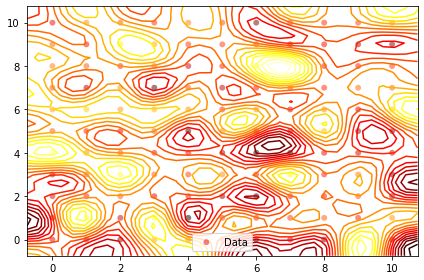

In [11]:
model2.plot()

Say we wish to predict the distribution in the point (3.5, 7.2). To do this, we use the `predict` method of `model2`.

In [13]:
def generate_2d_point(x, y):
    return np.array([x, y])[np.newaxis]

point2 = generate_2d_point(3.5, 7.2)
point2_predict_mean_noisy, point2_predict_var_noisy = model2.predict(point2)
print("The predicted mean in {} is".format(point2[0]), point2_predict_mean_noisy[0, 0])
print("The predicted variance in {} is".format(point2[0]), point2_predict_var_noisy[0, 0])

The predicted mean in [3.5 7.2] is -0.959607008247815
The predicted variance in [3.5 7.2] is 0.02523354870762095


Drawing samples from specific points is implemented in GPy using the method `posterior_samples` of `model2`. However, we demonstrate some weird behavior here. For the method, we first generate some points at whose distributions to sample at. Then we use it. The [documentation](https://gpy.readthedocs.io/en/deploy/GPy.models.html#GPy.models.tp_regression.TPRegression.posterior_samples) is unclear at this point, and I'm guessing the implementation is at least somewhat flawed. The shape of the array returned by `*.posterior_samples(*)` is (`n`, `output_dim`, `size`). As the method works for inputs of the wrong shape (see the following code snippet, where we generate  `n` 3-dimensional points as opposed to `n` 2-dimensional points), I'd be cautious when using it.

In [14]:
def wrongly_generate_random_2d_points(n):
    return stats.uniform.rvs(0, 10, size=(n, 3))

points = wrongly_generate_random_2d_points(5)

print("Generated points:")
print(points)
print("The shape of points is {}".format(points.shape))

fpoints = model2.posterior_samples(points)

print("The shape of fpoints (the array with the samples of each point) is {}".format(fpoints.shape))

Generated points:
[[7.52680882 2.79420058 4.6996015 ]
 [4.25274112 8.08375573 4.64042949]
 [3.50807501 2.82659442 7.55277118]
 [2.45420568 0.2098395  0.29214202]
 [6.05226273 1.38452351 5.96672796]]
The shape of points is (5, 3)
The shape of fpoints (the array with the samples of each point) is (5, 1, 10)


We consider the effects of using a different kernel in the 1-dimensional case. For example, consider the [periodic kernel](https://gpy.readthedocs.io/en/deploy/GPy.kern.src.html#GPy.kern.src.periodic.Periodic) `GPy.kern.src.periodic.PeriodicExponential`, whose covariance we plot.

{'covariance': [[<matplotlib.lines.Line2D at 0x19d883a7370>]]}

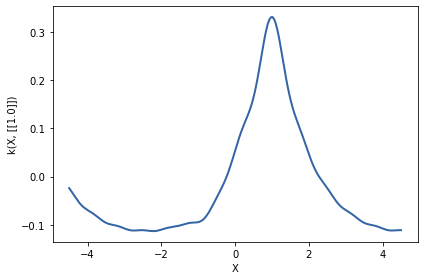

In [54]:
kern_periodic = gpy.kern.src.periodic.PeriodicExponential(period=7)
kern_periodic.plot()

We use the same data as before. 

{'dataplot': [<matplotlib.collections.PathCollection at 0x19d89a428b0>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x19d89a42d30>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x19d89a42fd0>]}

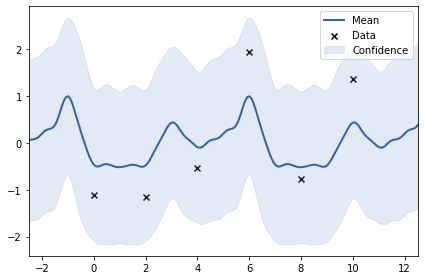

In [55]:
model_periodic = gpy.models.gp_regression.GPRegression(X1, fX1, kern_periodic)
model_periodic.Gaussian_noise.variance=0.5
model_periodic.plot()